In [1]:
import json
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import imageio
import seaborn as sns
import matplotlib.pyplot as plt
import jieba
import collections # 词频统计库

In [12]:
#画1个词云图
def get_photo(name):
    
    #设置停止词
    stop_words = []    
    with open(r"/Users/nika/Desktop/jiejie/chineseStopWords.txt") as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())
    #自定义停止词
    my_stop_words = ['第一期', '一堆', '三个', '真的', '哈哈哈', '哈哈哈哈', '啊啊啊']    
    stop_words.extend(my_stop_words)  
    
    #分词
    dff_sel = dff[dff.content.str.contains(name)]
    seg_list_exact = jieba.cut(dff_sel['content'].str.cat(sep='。'), cut_all=False) # 精确模式分词
    object_list = []
    for word in seg_list_exact: # 循环读出每个分词
        if word not in stop_words: # 如果不在去除词库中
            object_list.append(word) # 分词追加到列表

    word_counts = collections.Counter(object_list) # 对分词做词频统计
    
    #读取背景图片
    re_pic='/Users/nika/Desktop/jiejie/'+name+'.png'
    mk = imageio.imread(re_pic)
    wordcloud = WordCloud(background_color='white',
                          #设置字体为中文字体！！！
                          font_path="/Library/Fonts/Songti.ttc",
                          #设置清晰度
                          scale=15,mask=mk,stopwords=stop_words).generate_from_frequencies(word_counts) # 从字典生成词云
    image_colors = ImageColorGenerator(mk)
    #将图片颜色应用到词云中
    wc_color = wordcloud.recolor(color_func=image_colors)
    new_pic='/Users/nika/Desktop/jiejie/'+'new_'+name+'.png'
    #保存图片
    wc_color.to_file(new_pic)
    plt.imshow(wc_color)

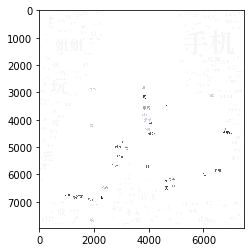

In [19]:
dff=pd.read_excel('danmu.xlsx')
dff['content'] = dff.content.astype('str')
name='手机'
get_photo(name)

In [ ]:
#给每个姐姐画
dff=pd.read_excel('danmu.xlsx')
dff['content'] = dff.content.astype('str')
my_words_list =['袁咏琳','朱婧汐','钟丽缇','王智','沈梦辰','陈松伶','阿朵','白冰','海陆','刘芸','孟佳','金莎','伊能静','王霏霏','许飞','张萌',
                '黄龄','吴昕','金晨','王丽坤','李斯丹妮','蓝盈莹','张含韵','郑希怡','宁静','郁可唯','黄圣依','丁当','万茜','张雨绮']

for name in my_words_list:
    get_photo(name)